<a href="https://colab.research.google.com/github/JaganFoundr/Binary_Classification/blob/main/torch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
#importing libraries
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

In [162]:
#device
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [163]:
#creating dataset
n_samples=1000
x,y=make_circles(n_samples,noise=0.02, random_state=42)

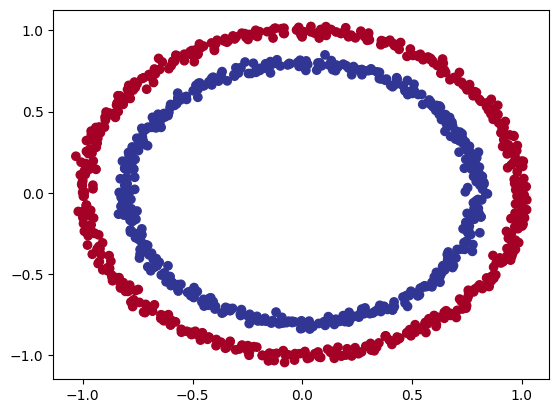

In [164]:
#visualising the plot of out dataset
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [165]:
#making x and y from numpy to tensors and putting it inside the device
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

x,y=x.to(device), y.to(device)

In [166]:
#splitting dataset as training and validation
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [167]:
#setting up the model and putting it in device
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear1=nn.Linear(in_features=2,out_features=10)
    self.linear2=nn.Linear(in_features=10, out_features=10)
    self.linear3=nn.Linear(in_features=10, out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    out1=self.linear1(x)
    f1=self.relu(out1)

    out2=self.linear2(f1)
    f2=self.relu(out2)

    out3=self.linear3(f2)
    return out3
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model=CircleModelV2().to(device)

In [168]:
#loss function
loss_function=nn.BCEWithLogitsLoss()

In [186]:
#optimizer
optimizer=torch.optim.Adam(model.parameters(), lr=0.1)

In [187]:
# function for accuracy
def accuracy(output, labels):
  probs=torch.sigmoid(output)
  pred=(probs>0.5).float()
  return torch.sum(pred==labels).item()/len(labels)*100


Epoch 10/100: Train Loss = 0.5052, Test Loss = 0.5174
Train Accuracy: 78.75%, Test Accuracy: 73.50%

Epoch 20/100: Train Loss = 0.1125, Test Loss = 0.1062
Train Accuracy: 98.50%, Test Accuracy: 99.00%

Epoch 30/100: Train Loss = 0.0110, Test Loss = 0.0199
Train Accuracy: 100.00%, Test Accuracy: 99.50%

Epoch 40/100: Train Loss = 0.0035, Test Loss = 0.0069
Train Accuracy: 100.00%, Test Accuracy: 100.00%

Epoch 50/100: Train Loss = 0.0010, Test Loss = 0.0035
Train Accuracy: 100.00%, Test Accuracy: 100.00%

Epoch 60/100: Train Loss = 0.0006, Test Loss = 0.0044
Train Accuracy: 100.00%, Test Accuracy: 100.00%

Epoch 70/100: Train Loss = 0.0004, Test Loss = 0.0020
Train Accuracy: 100.00%, Test Accuracy: 100.00%

Epoch 80/100: Train Loss = 0.0004, Test Loss = 0.0018
Train Accuracy: 100.00%, Test Accuracy: 100.00%

Epoch 90/100: Train Loss = 0.0003, Test Loss = 0.0017
Train Accuracy: 100.00%, Test Accuracy: 100.00%

Epoch 100/100: Train Loss = 0.0003, Test Loss = 0.0018
Train Accuracy: 100.00

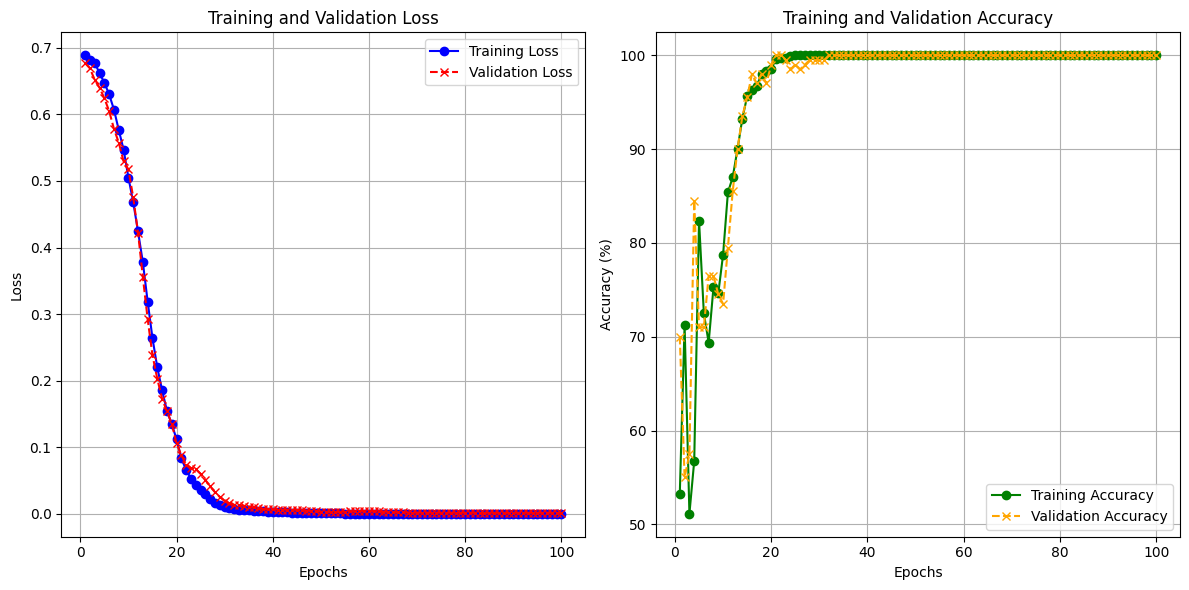

In [188]:
nepochs = 100
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(nepochs):
    # Training phase
    model.train()
    y_train_pred = model(x_train)
    train_loss = loss_function(y_train_pred, y_train.unsqueeze(-1))
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Evaluation phase
    model.eval()
    with torch.inference_mode():
        y_test_pred = model(x_test)
        test_loss = loss_function(y_test_pred, y_test.unsqueeze(-1))

    # Compute accuracy
    train_acc = accuracy(y_train_pred, y_train.unsqueeze(-1))
    test_acc = accuracy(y_test_pred, y_test.unsqueeze(-1))

    # Store metrics
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Print metrics every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"\nEpoch {epoch+1}/{nepochs}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")
        print(f"Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")

# Plotting
epochs = range(1, nepochs + 1)

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Training Loss", color='blue', marker='o')
plt.plot(epochs, test_losses, label="Validation Loss", color='red', linestyle='--', marker='x')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Training Accuracy", color='green', marker='o')
plt.plot(epochs, test_accuracies, label="Validation Accuracy", color='orange', linestyle='--', marker='x')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

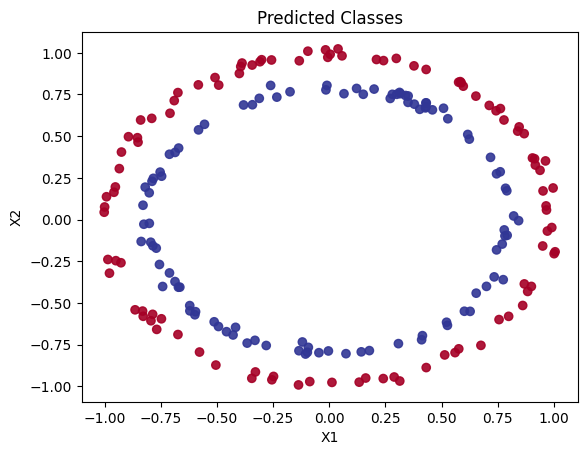

In [189]:
 # Visualizing predictions
with torch.inference_mode():
    y_pred_probs = torch.sigmoid(model(x_test))
    y_pred_labels = (y_pred_probs > 0.5).float()

# Scatter plot of predictions
plt.scatter(x=x_test[:, 0], y=x_test[:, 1], c=y_pred_labels, cmap=plt.cm.RdYlBu, alpha=0.9)
plt.title("Predicted Classes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


helper_functions.py already exists, skipping download


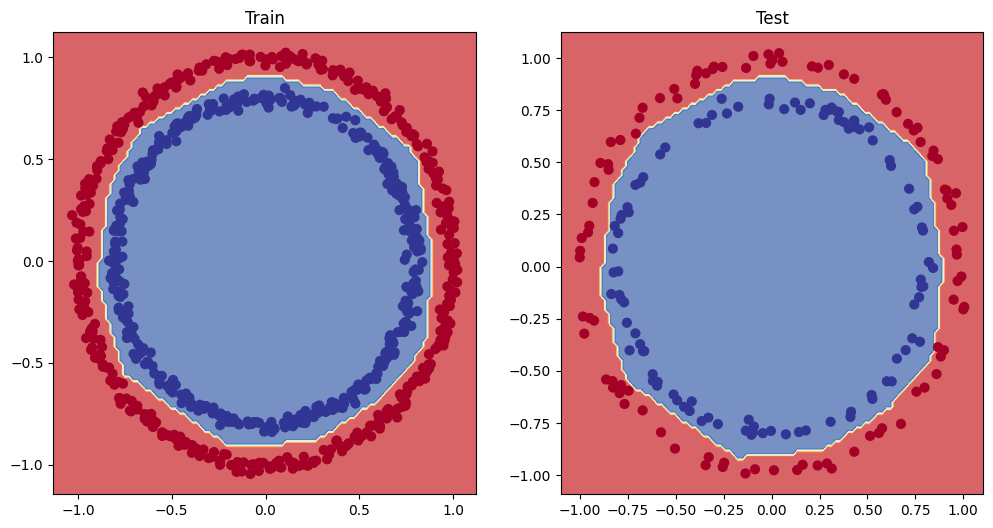

In [190]:
#using helper functions
import requests
from pathlib  import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("downloading helper_fucntions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)